In [ ]:
# Other visualizations
!pip install textblob

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)


In [13]:
data.head(5)

,UserId,Location,Rating,Headline,Review,Date,Value Rating,Food Rating,Service Rating,Atmosphere Rating,Sentiment Score,Sentiment Category
0,rbrech,Silver Spring,3,"Good, not great.",This is a fine Italian restaurant. Nothing out...,2020-03-14,3,3,3,3,0.193519,Positive
1,Diane O,Unknown,1,Valentine's Dinner was AWFUL,Our Valentine's dinner last night was a comple...,2020-02-14,1,1,4,1,-0.005220,Negative
2,L4Y,Unknown,3,New years eve pre-fixed dinner,Let me start by saying we usually love this pl...,2020-01-09,4,4,4,4,0.163333,Positive
3,Happy201501,Bradenton,5,A Classic Local Italian Restaurant Maintains i...,We returned to Dolce Vita after a lapse of 5 y...,2020-01-06,4,4,4,4,0.580000,Positive
4,jchizzon,Clinton,4,On a recent trip to Northern,"On a recent trip to Northern Virginia, I ate a...",2020-01-03,4,4,4,4,0.212000,Positive


           Rating  Value Rating  Food Rating  Service Rating  \
count  410.000000    410.000000   410.000000      410.000000   
mean     4.095122      4.014634     4.112195        4.158537   
std      1.118078      0.889922     0.891194        0.810528   
min      1.000000      1.000000     1.000000        1.000000   
25%      4.000000      4.000000     4.000000        4.000000   
50%      4.000000      4.000000     4.000000        4.000000   
75%      5.000000      5.000000     5.000000        5.000000   
max      5.000000      5.000000     5.000000        5.000000   

       Atmosphere Rating  
count         410.000000  
mean            4.046341  
std             0.839314  
min             1.000000  
25%             4.000000  
50%             4.000000  
75%             5.000000  
max             5.000000  


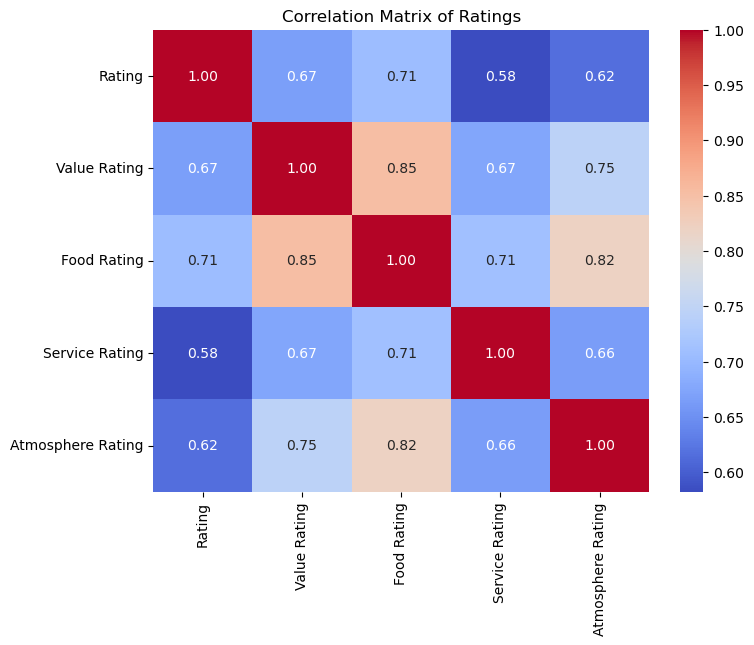

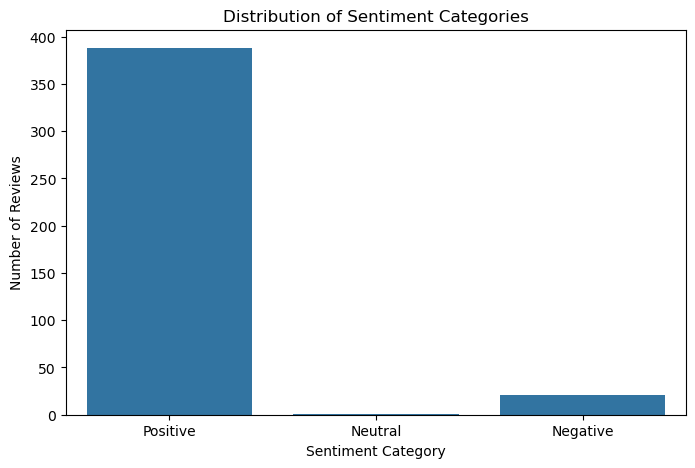

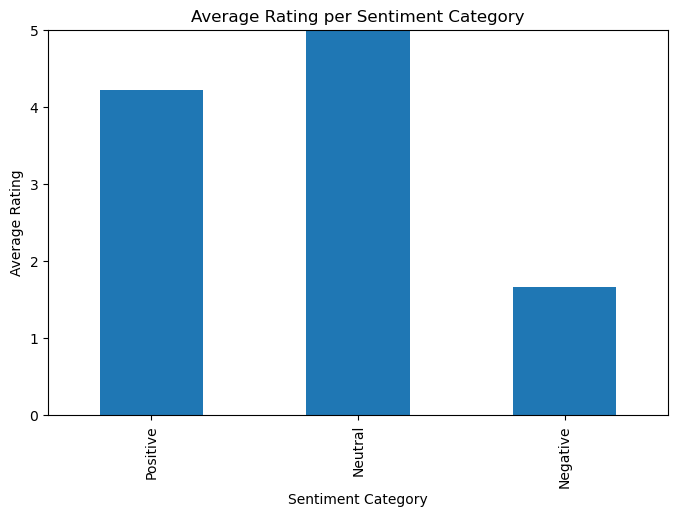

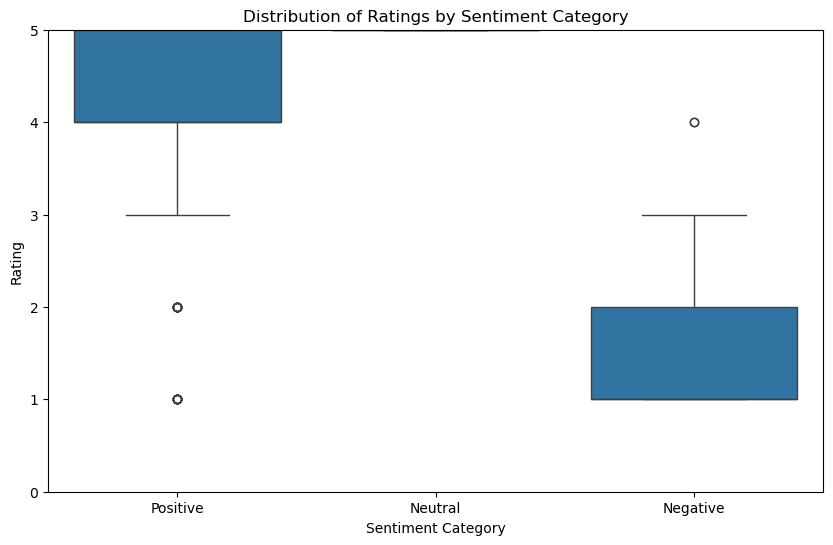

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
file_path = 'C://Users//meghn//Downloads//Cleaned_Dolche_Vita_Reviews.csv'
data = pd.read_csv(file_path)

# Step 1: Data Cleaning and Preprocessing
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Standardize column names by removing extra spaces
data.columns = data.columns.str.strip()
data.rename(columns={'Service  Rating': 'Service Rating', 'Atmosphere  Rating': 'Atmosphere Rating'}, inplace=True)

# Step 2: Descriptive Analysis and Correlation
# Descriptive statistics for ratings columns
descriptive_stats = data[['Rating', 'Value Rating', 'Food Rating', 'Service Rating', 'Atmosphere Rating']].describe()
print(descriptive_stats)

# Correlation matrix
correlation_matrix = data[['Rating', 'Value Rating', 'Food Rating', 'Service Rating', 'Atmosphere Rating']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ratings')
plt.show()

# Step 3: Sentiment Analysis
# Apply sentiment analysis on the 'Review' column
data['Sentiment Score'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Sentiment Category'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Step 4: Visualization of Sentiment Category Distribution
# Count plot for sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment Category', data=data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

# Additional Analysis: Average Rating per Sentiment Category
avg_rating_per_sentiment = data.groupby('Sentiment Category')['Rating'].mean().reindex(['Positive', 'Neutral', 'Negative'])

# Plot average rating per sentiment category
plt.figure(figsize=(8, 5))
avg_rating_per_sentiment.plot(kind='bar')
plt.title('Average Rating per Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()

# Distribution of ratings within each sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment Category', y='Rating', data=data, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Ratings by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Rating')
plt.ylim(0, 5)
plt.show()


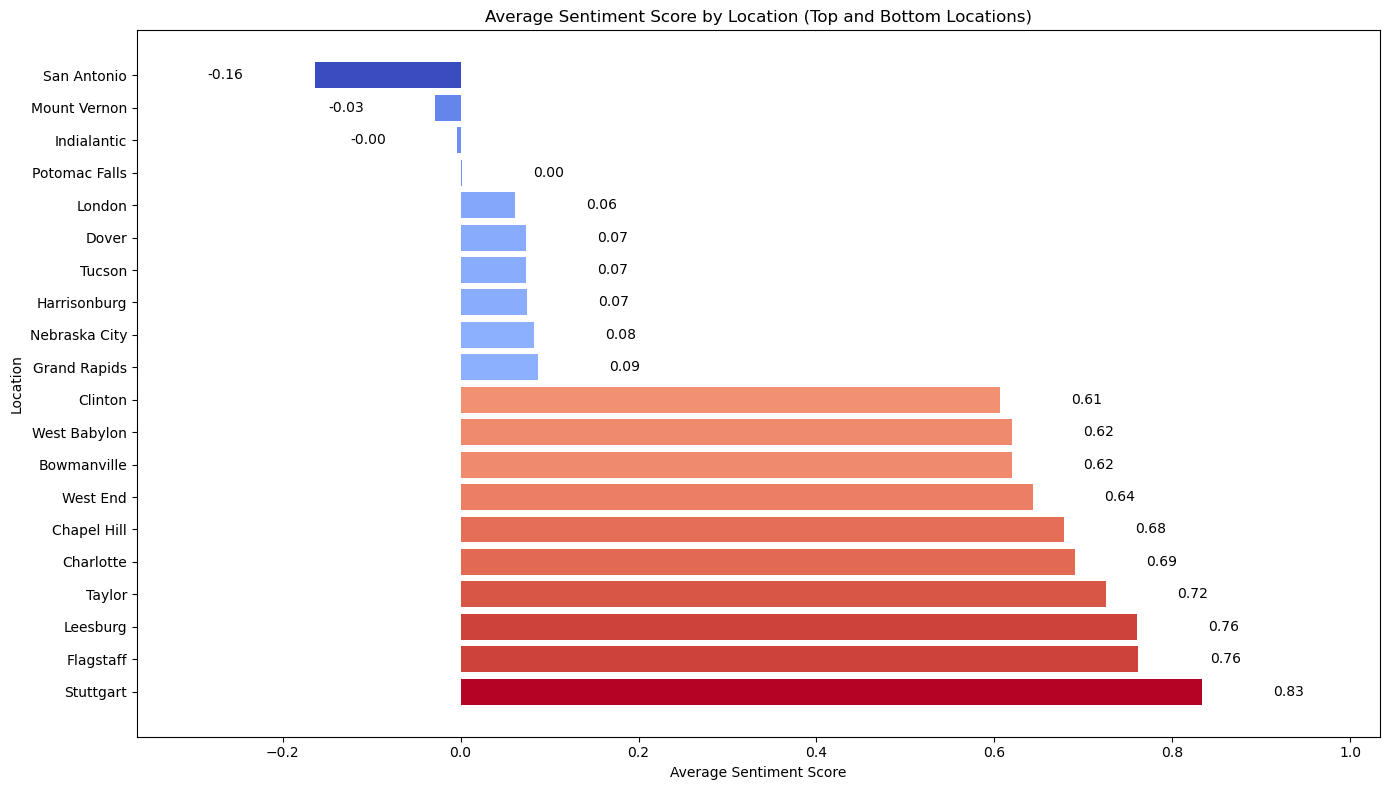

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Calculate average sentiment score by location
location_sentiment_avg = data.groupby('Location')['Sentiment Score'].mean().sort_values(ascending=True)

# Step 2: Select top 10 highest and lowest sentiment scores for locations to reduce clutter
top_bottom_locations = pd.concat([location_sentiment_avg.head(10), location_sentiment_avg.tail(10)])

# Step 3: Plot with diverging color palette for clearer differentiation
plt.figure(figsize=(14, 8))  # Increased width for more space
bars = plt.barh(
    top_bottom_locations.index,
    top_bottom_locations,
    color=plt.cm.coolwarm((top_bottom_locations - top_bottom_locations.min()) / (top_bottom_locations.max() - top_bottom_locations.min()))
)
plt.gca().invert_yaxis()  # Invert for descending order
plt.title('Average Sentiment Score by Location (Top and Bottom Locations)')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Location')

# Add padding to x-axis limits to ensure labels fit within the visible range
min_score, max_score = top_bottom_locations.min(), top_bottom_locations.max()
plt.xlim(min_score - 0.2, max_score + 0.2)  # Adjust padding as needed

# Adding data labels with adjusted positioning
for bar, score in zip(bars, top_bottom_locations):
    # Set position and alignment based on the sign of the score
    x_position = score + 0.08 if score >= 0 else score - 0.08  # Slightly larger padding to prevent overlap
    alignment = 'left' if score >= 0 else 'right'
    plt.text(x_position, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center', ha=alignment, fontsize=10, clip_on=False)

plt.tight_layout()
plt.show()


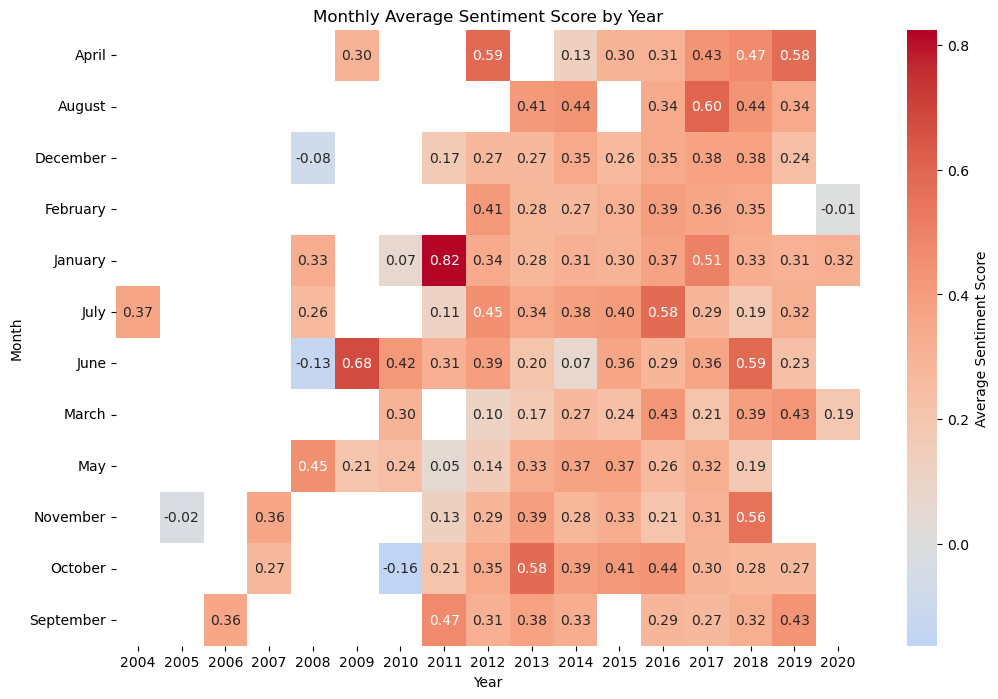

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is already loaded and preprocessed

# Step 1: Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Step 2: Extract Year and Month from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Step 3: Calculate monthly average sentiment score for each year
monthly_sentiment_avg = data.groupby(['Year', 'Month'])['Sentiment Score'].mean().reset_index()

# Step 4: Convert month numbers to month names for better readability on the y-axis
monthly_sentiment_avg['Month'] = monthly_sentiment_avg['Month'].apply(lambda x: pd.Timestamp(f'2024-{x}-01').strftime('%B'))

# Step 5: Pivot data to prepare for heatmap plotting
sentiment_time_heatmap_data = monthly_sentiment_avg.pivot(index="Month", columns="Year", values="Sentiment Score")

# Step 6: Plot the heatmap with color gradient to show sentiment scores
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_time_heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={'label': 'Average Sentiment Score'})
plt.title('Monthly Average Sentiment Score by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()
